<a href="https://colab.research.google.com/gist/parulnith/7f8c174e6ac099e86f0495d3d9a4c01e/untitled9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NN based Progressive Rock and Others genres music classification

A single row contaning mean of all time samples is generated for each song corresponding to all the music features provided by librosa.

## Importing Libraries

In [0]:
# feature extractoring and preprocessing data
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Keras
import keras

import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/gdrive')

Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


## User Parameters
  
**pathToSongFolder**: Folder location where all the songs are present  
**pathToStorageFolder**: Folder location where to save the generated features  
**folders**:  Name of the folders in path which contains differnet genres of songs.  
**featureFileName**: File name for the generated Input features for training set 


In [0]:
pathToSongFolder = f'/content/gdrive/My Drive/ML test/'
pathToStorageFolder = f'/content/gdrive/My Drive/My test/'
folders = 'Progressive Rock Songs;Other Songs;Additional Pop Songs;Top Of The Pops'.split(';')
# Data.csv includes all the lirosa features
# featureFileName = 'data.csv'

# fullSongList_AVG_and_VAR.csv includes temo custom feature in addition to all librosa feature
featureFileName = 'fullSongList_AVG_and_VAR.csv'

## Plot Spectograms

In [0]:
cmap = plt.get_cmap('inferno')

plt.figure(figsize=(10,10))
for g in folders:
    count = 0
    pathlib.Path(pathToStorageFolder + g).mkdir(parents=True, exist_ok=True)     
    for filename in os.listdir(pathToSongFolder +g):
        songname = pathToSongFolder +g + '/' + filename
        print(songname)
        y, sr = librosa.load(songname, mono=True)
        plt.specgram(y, NFFT=2048, Fs=sr, Fc=0, noverlap=128, detrend='mean',cmap=cmap, sides='default', mode='default');
        plt.savefig(pathToStorageFolder +{g}/{filename[:-3].replace(".", "")}.png')
        plt.clf()
        count +=1;
        if(count == 10):
            break
 

## GenerateFeatures

In [0]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate chroma_cqt spec_flatness rms_feat poly_feat spec_contrast tonnetz_feat'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [0]:
file = open(pathToStorageFolder + featureFileName, 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
for g in folders:
    for filename in os.listdir(pathToSongFolder +{g}'):
        songname = pathToSongFolder +{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        rmse = librosa.feature.rmse(y=y)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        chroma_cqt = librosa.feature.chroma_cqt(y=y,sr=sr)
        spec_flatness = librosa.feature.spectral_flatness(y=y)
        rms_feat = librosa.feature.rms(y=y)
        poly_feat = librosa.feature.poly_features(y=y,sr=sr)
        spec_contrast = librosa.feature.spectral_contrast(y=y,sr=sr)
        tonnetz_feat = librosa.feature.tonnetz(y=y,sr=sr)
        to_append = f'{filename.replace(" ","")} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(chroma_cqt)} {np.mean(rolloff)} {np.mean(zcr)} {np.mean(spec_bw)} {np.mean(spec_flatness)} {np.mean(rms_feat)} {np.mean(poly_feat)} {np.mean(spec_contrast)} {np.mean(tonnetz_feat)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g.replace(" ","")}'
        file = open(pathToStorageFolder + featureFileName, 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

## Train Model

In [0]:
import pandas as pd
data = pd.read_csv(pathToStorageFolder + featureFileName)
print(data.shape)
data.head()

(375, 37)


,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,chroma_cqt,spec_flatness,rms_feat,...,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,tempo_mean,tempo_var,class_label,label
0,01-AutumnLords.mp3,0.458984,0.087573,2835.998414,0.547974,5768.140121,0.161872,2576.214498,0.052652,0.087573,...,-6.152676,1.172609,-7.294826,0.619726,-3.537041,-0.449951,127.521307,367.877424,1,ProgressiveRockSongs
1,01-BirdsofFire.mp3,0.366396,0.014509,1324.211325,0.452160,2399.377158,0.061789,1719.989921,0.035195,0.014509,...,-2.746372,3.000363,-0.199142,0.878266,2.032715,1.476688,136.528458,293.251422,1,ProgressiveRockSongs
2,01-Luminol.mp3,0.495776,0.138334,2346.170486,0.516698,5179.068683,0.074686,2595.841767,0.023965,0.138334,...,-6.781801,2.793957,-5.535972,-3.534045,-4.958858,-0.159028,114.603547,1378.383149,1,ProgressiveRockSongs
3,01-MySpiritWillGoOn.mp3,0.387562,0.185199,1424.121206,0.475270,2933.982259,0.064656,1535.714557,0.040392,0.185199,...,-4.213843,-2.745600,-1.772508,1.217757,-4.834396,-3.322689,111.528423,440.832679,1,ProgressiveRockSongs
4,01-SongWithinASong.mp3,0.327052,0.117415,1516.873108,0.442176,3053.939867,0.067524,1820.068249,0.040048,0.117415,...,-8.280826,-3.393032,-5.781215,-2.630359,-6.927148,-1.931267,132.213701,691.493473,1,ProgressiveRockSongs


## Feature Testing
UnComment the line to remove that feature for training. It was done to idenitfy the contribution of each feature.

In [0]:

data = data.drop(['tempo_mean'],axis=1)
data = data.drop(['tempo_var'],axis=1)
# data = data.drop(['zero_crossing_rate'],axis=1)
# data = data.drop(['chroma_stft'],axis=1)
# data = data.drop(['rmse'],axis=1)
# data = data.drop(['spectral_centroid'],axis=1)
# data = data.drop(['spectral_bandwidth'],axis=1)
# data = data.drop(['rolloff'],axis=1)
# data = data.drop(['chroma_cqt'],axis=1)
# data = data.drop(['spec_flatness'],axis=1)
# data = data.drop(['rms_feat'],axis=1)
# data = data.drop(['poly_feat'],axis=1)
# data = data.drop(['spec_contrast'],axis=1)
# data = data.drop(['tonnetz_feat'],axis=1)

In [0]:
data = data.drop(['filename'],axis=1)
data = data.drop(['class_label'],axis=1)
data = data.replace({"OtherSongs": "NonProgressiveProgRock","AdditionalPopSongs":"NonProgressiveProgRock","TopOfThePops":"NonProgressiveProgRock" })

In [0]:
# Drop the label column and use it to generate Y vector
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

In [0]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [0]:
from keras import models
from keras import layers
from sklearn.metrics import confusion_matrix

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(4, activation='softmax'))

Epoch 1/30
300/300 [==============================] - 0s 959us/step - loss: 1.4200 - acc: 0.2267
Epoch 2/30
300/300 [==============================] - 0s 66us/step - loss: 1.0192 - acc: 0.8000
Epoch 3/30
300/300 [==============================] - 0s 63us/step - loss: 0.7514 - acc: 0.8133
Epoch 4/30
300/300 [==============================] - 0s 66us/step - loss: 0.6052 - acc: 0.8133
Epoch 5/30
300/300 [==============================] - 0s 70us/step - loss: 0.5193 - acc: 0.8133
Epoch 6/30
300/300 [==============================] - 0s 60us/step - loss: 0.4565 - acc: 0.8233
Epoch 7/30
300/300 [==============================] - 0s 70us/step - loss: 0.4365 - acc: 0.8233
Epoch 8/30
300/300 [==============================] - 0s 74us/step - loss: 0.4211 - acc: 0.8333
Epoch 9/30
300/300 [==============================] - 0s 70us/step - loss: 0.3880 - acc: 0.8533
Epoch 10/30
300/300 [==============================] - 0s 62us/step - loss: 0.3676 - acc: 0.8367
Epoch 11/30
300/300 [=================

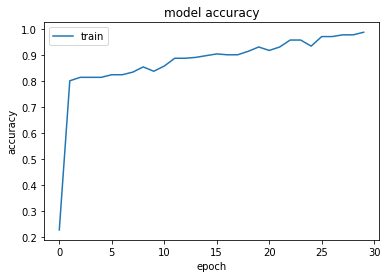

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train,
                    y_train,
                    epochs=30,
                    batch_size=128)

plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print('test_acc: ',test_acc)

75/75 [==============================] - 0s 607us/step
test_acc:  0.76


## Train Accuracy

In [0]:
predictions = model.predict(X_train)
print(predictions.shape, X_train.shape)
error = 0
y_pred = np.ones(y_train.shape)
for i in range(predictions.shape[0]):
    out = np.argmax(predictions[i])
    y_pred[i] = out
print(error)
confusion_matrix(y_train,y_pred)

(300, 4) (300, 32)
0


array([[244,   0],
       [  4,  52]])

## Test Accuracy

In [0]:
predictions = model.predict(X_test)
print(predictions.shape, X_test.shape)
error = 0
y_pred = np.ones(y_test.shape)

y_act = np.array(y_test, copy=True) 
for i in range(predictions.shape[0]):
    out = np.argmax(predictions[i])
    y_pred[i] = out
confusion_matrix(y_act,y_pred)

(75, 4) (75, 32)


array([[52,  6],
       [16,  1]])